In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE

sys.path.insert(0, '../src/data')
sys.path.insert(0, '../src/features')
sys.path.insert(0, '../src/models')
sys.path.insert(0, '../src/visualization')

from data_manager import DataManager

from ada_boost import AdaBoost
from decision_tree import DecisionTree
from k_means import KMeans
from svm import Svm
from neural_network import NeuralNetwork
from perceptron import Perceptron

from visualize import Visualize

## Prétraitement des données

In [3]:
raw_path = '../data/raw/train.csv'
test_path = '../data/raw/test.csv'
superclasses_path = '../data/processed/superclasses.csv'
normalized_path = '../data/processed/data_normalisee.csv'
no_outliers_path = '../data/processed/data_no_outliers_1%.csv'
no_outliers_normalized_path = '../data/processed/data_without_outliers_and_normalized.csv'
pca_path = '../data/processed/data_pca.csv'

rawDataset = DataManager(raw_path, "Raw")
# testDataset = DataManager(test_path, "Test dataset")
superclassesDataset = DataManager(superclasses_path, "Superclasses")
normalizedDataset = DataManager(normalized_path, "Normalized")
noOutliersDataset = DataManager(no_outliers_path, "No outliers")
noOutliersNormalizedDataset = DataManager(no_outliers_normalized_path, "No outliers and normalized")
pcaDataset = DataManager(pca_path, "PCA")

## Chargement des données

In [4]:
def train_and_visualize(model, hyperparameters, dataset, name):
    model.train(dataset.x_train, dataset.t_train, hyperparameters)
    t_pred = model.predict(dataset.x_test)
    t_pred_proba = model.predict_proba(dataset.x_test)
    visualize = Visualize(dataset.constants, dataset.t_test, t_pred, t_pred_proba, name)

    return visualize

In [5]:
def run(model, lazy = True):
    hyperparameters_choices = model.get_hyperparameters_choices()
    best_hyperparameters = model.find_optimal_hyperparameters(rawDataset.x_train, rawDataset.t_train, hyperparameters_choices)
    visualize_standard = train_and_visualize(model, best_hyperparameters, rawDataset, f"Hyperparamètres optimaux, database standard")
    visualize_standard.plot_mean_scores(title=f"{model.name} Performance", filename=f"{model.__class__.__name__}_performance", 
        filepath=f"../graphs/{model.__class__.__name__}")

    visualize_standard.plot_confusion_matrix(show_label=False,
        filename=f"{model.__class__.__name__}_Confusion_matrix",
        filepath=f"../graphs/{model.__class__.__name__}")
    visualize_standard.plot_learning_curve(model.model, "Learning Curve", rawDataset.x_train, rawDataset.t_train, cv=5,
        filename=f"{model.__class__.__name__}_Learning_curve", 
        filepath=f"../graphs/{model.__class__.__name__}")

    
    hyperparameters = model.get_alea_hyperparameters(hyperparameters_choices)
    visualize_random = train_and_visualize(model, hyperparameters, rawDataset, f"Hyperparamètres aléatoires, database standard")
    visualize_random.plot_mean_scores(
        visualize_standard, 
        title=f"{model.name} Performance with/without hyperparameters optimization", 
        filename=f"{model.__class__.__name__}_performance_with_without_hyperparameters_optimization", 
        filepath=f"../graphs/{model.__class__.__name__}"
    )
    
    for dataset in [superclassesDataset, normalizedDataset, noOutliersDataset, noOutliersNormalizedDataset, pcaDataset]:
        if lazy == False:
            best_hyperparameters = model.find_optimal_hyperparameters(dataset.x_train, dataset.t_train, hyperparameters_choices)
        visualize_optimized = train_and_visualize(model, best_hyperparameters, dataset, f"Hyperparamètres optimaux, database {dataset.name}")
        filename = dataset.name.strip()
        visualize_standard.plot_mean_scores(
            visualize_optimized, 
            title=f"Comparaison des modèles avec {filename}", 
            filename=f"comparaison_dataset_raw_{filename}", 
            filepath=f"../graphs/{model.__class__.__name__}"
            )

## Préparation du modèle

### Arbre de décision

In [6]:
run(DecisionTree(), lazy = True)

### Perceptron

/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/t

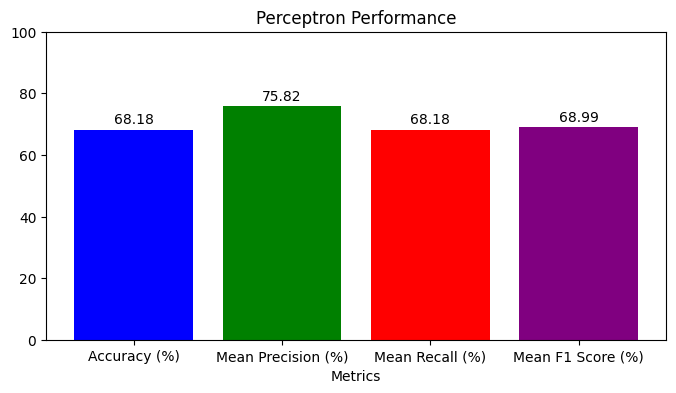

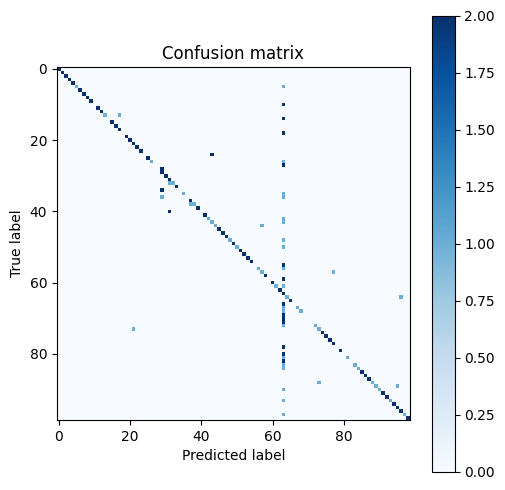

/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/t

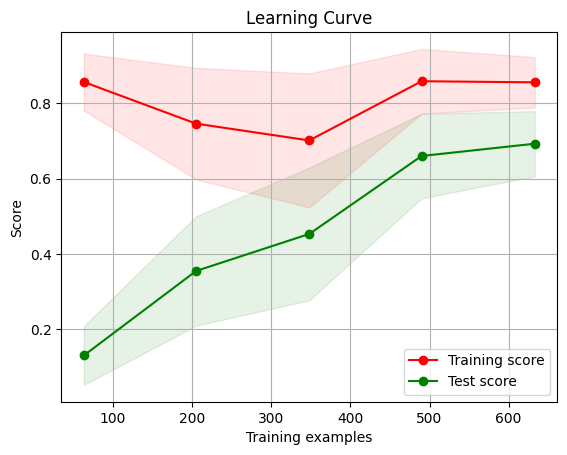

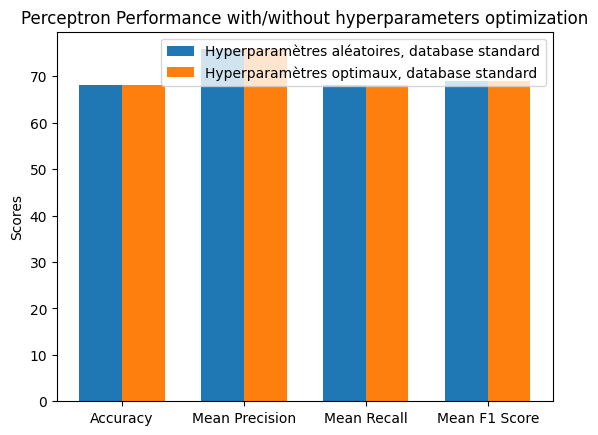

/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


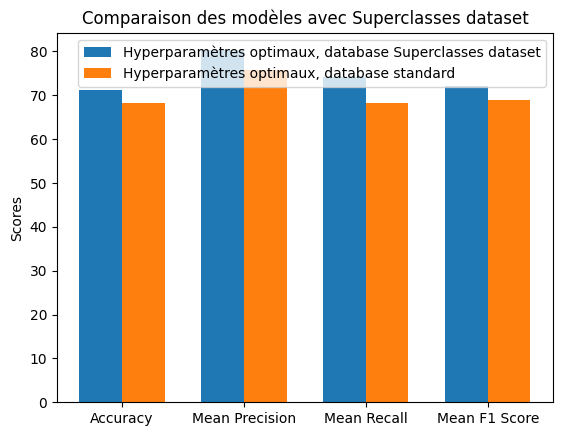

/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


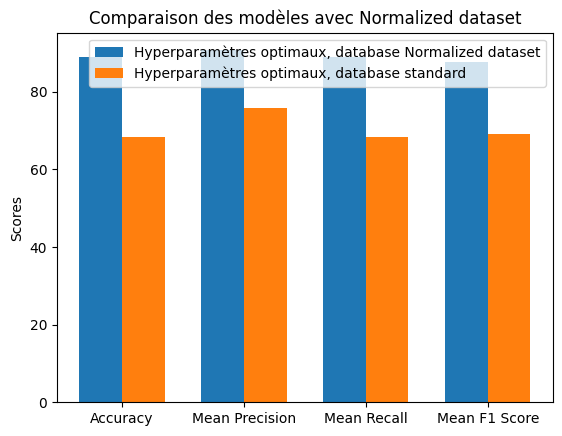

/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


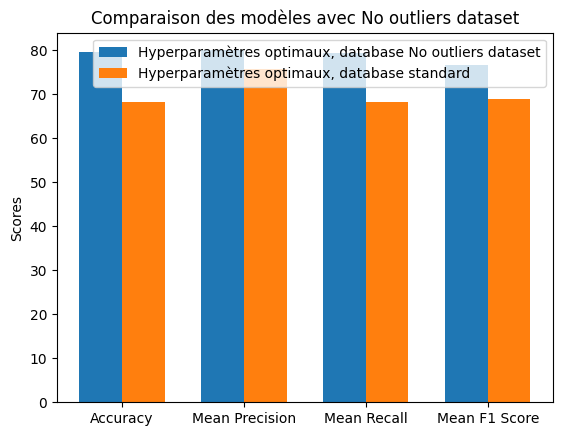

/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


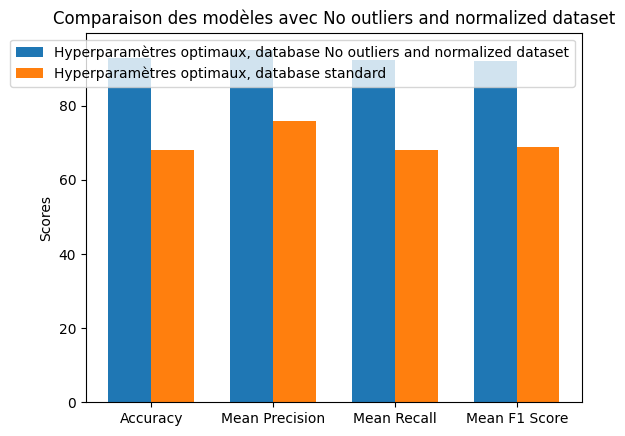

/home/timwhity/Documents/0_Sherbrooke/CoursSherbrooke/IFT712-Technique d'apprentissage/TPOussama/Projet/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


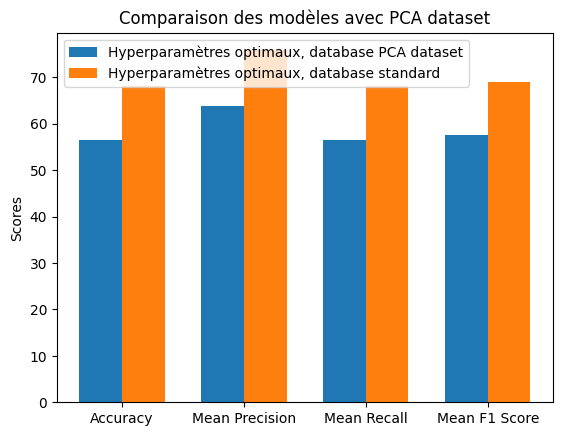

In [ ]:
run(Perceptron(), lazy = True)

### Réseau de neurones

In [ ]:
run(NeuralNetwork(), lazy = True)

### Adaboost

In [ ]:
run(AdaBoost(), lazy = True)

### SVM

In [ ]:
run(Svm(), lazy = True)

### K-means

In [ ]:
run(KMeans(), lazy = True)